In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [ ]:
#https://www.kaggle.com/datasets/shubh0799/churn-modelling

In [ ]:
#https://drive.google.com/file/d/1pxYxT2y2qb7GHQpAFSDYIre7mQEHcuib/view?usp=sharing

In [ ]:
! gdown --id 1pxYxT2y2qb7GHQpAFSDYIre7mQEHcuib

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1pxYxT2y2qb7GHQpAFSDYIre7mQEHcuib
To: /content/churn.zip
100% 268k/268k [00:00<00:00, 92.7MB/s]


In [ ]:
df=pd.read_csv('/content/churn.zip')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
len(df)

10000

In [ ]:
df.isna().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [ ]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 690 kB 4.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [ ]:
df['Exited'].mean()

0.2037

Обучающая валидационная и тестовая выборка

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#stratify - определяем поле, по которому важно качественно пропорциональное 
#сплитование (равная доля отточников)
train, test = train_test_split(df, train_size = 0.6, random_state=42, stratify =df['Exited'] )

In [ ]:
val, test = train_test_split(test, train_size = 0.5, random_state=42,  stratify =test['Exited'])

In [ ]:
len(val)/len(df)

0.2

In [ ]:
#проверим сплитование
val['Exited'].mean()

0.204

In [ ]:
test['Exited'].mean()

0.2035

In [ ]:
train['Exited'].mean()

0.20366666666666666

Phik

Человеческое обучение

In [ ]:
train_full = pd.concat([train,val])

In [ ]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0


In [ ]:
len(train_full)

8000

In [ ]:
import phik

In [ ]:
phik_overview= train_full.phik_matrix()

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:62: UserWarning: The number of unique values of variable Surname is large: 2591. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  col, df[col].nunique()


In [ ]:
phik_overview['Exited'].sort_values(ascending=False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

In [ ]:
train_full['NumOfProducts'].value_counts()

1    4060
2    3673
3     219
4      48
Name: NumOfProducts, dtype: int64

In [ ]:
train_full.groupby('NumOfProducts')['Exited'].agg(['count','mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


In [ ]:
model= train_full.groupby('NumOfProducts')['Exited'].agg(['mean']).reset_index()

In [ ]:
model = model.rename({'mean':'score_prod'}, axis=1)

In [ ]:
model 

,NumOfProducts,score_prod
0,1,0.275369
1,2,0.077049
2,3,0.826484
3,4,1.000000


In [ ]:
train_full= train_full.merge(model, how='left', on= 'NumOfProducts')

In [ ]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049


Baseline

In [ ]:
train_full['score_mean']=train_full['Exited'].mean()

In [ ]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049,0.20375


In [ ]:
 from sklearn.metrics import log_loss

In [ ]:
log_loss(train_full['Exited'],train_full['score_mean'] )

0.5055572860042145

In [ ]:
log_loss(train_full['Exited'],train_full['score_prod'] )

0.4359616823203511

Uplift

In [ ]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375


In [ ]:
train_full['Exited'].sample(frac=0.2, random_state=42).mean()

0.210625

In [ ]:
exited_all=train_full['Exited'].sum()
exited_all

1630

In [ ]:
train_full['Exited'].sample(frac=0.2, random_state=42).sum()

337

In [ ]:
train_full['Exited'].sample(frac=0.2, random_state=42).sum()/exited_all

0.2067484662576687

In [ ]:
train_full =train_full.sort_values('score_prod', ascending=False)

In [ ]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
6946,6876,15665283,Brookes,610,France,Female,57,7,72092.95,4,0,1,113228.82,1,1.000000,0.20375
1245,3153,15724161,Sutton,644,France,Female,40,9,137285.26,4,1,0,77063.63,1,1.000000,0.20375
7056,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1,1.000000,0.20375
7847,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,1.000000,0.20375
693,7568,15750545,Chidiebere,629,France,Male,44,5,0.00,4,0,0,117572.59,1,1.000000,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,7543,15768777,Wang,507,Spain,Female,34,4,0.00,2,1,1,60688.38,0,0.077049,0.20375
4912,4011,15685654,Allan,514,Spain,Male,66,9,0.00,2,1,1,14234.31,0,0.077049,0.20375
4913,4872,15575858,Bergamaschi,763,France,Male,40,3,0.00,2,1,0,134281.11,0,0.077049,0.20375
4914,1650,15569423,Cunningham,731,Spain,Male,41,4,0.00,2,1,0,22299.27,0,0.077049,0.20375


In [ ]:
round(len(train_full)*0.2)

1600

In [ ]:
train_full.head(round(len(train_full)*0.2))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
6946,6876,15665283,Brookes,610,France,Female,57,7,72092.95,4,0,1,113228.82,1,1.000000,0.20375
1245,3153,15724161,Sutton,644,France,Female,40,9,137285.26,4,1,0,77063.63,1,1.000000,0.20375
7056,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1,1.000000,0.20375
7847,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,1.000000,0.20375
693,7568,15750545,Chidiebere,629,France,Male,44,5,0.00,4,0,0,117572.59,1,1.000000,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,1590,15617518,Hu,675,Germany,Male,36,7,89409.95,1,1,1,149399.70,0,0.275369,0.20375
7270,3716,15640409,Carpenter,817,Germany,Female,46,0,89087.89,1,0,1,87941.85,1,0.275369,0.20375
7287,2707,15595071,Ramos,696,France,Male,22,9,149777.00,1,1,1,198032.93,0,0.275369,0.20375
7283,9183,15665579,Cartwright,597,France,Female,28,0,142705.95,1,1,0,127233.39,0,0.275369,0.20375


In [ ]:
train_full.head(round(len(train_full)*0.2))['Exited'].sum()/exited_all

0.3576687116564417

In [ ]:
0.3576687116564417/0.2067484662576687

1.7299703264094954

Добавим шум

In [ ]:
import numpy as np

In [ ]:
np.random.seed(42)
np.random.uniform(0, 0.001, size=len(train_full) )

array([0.00037454, 0.00095071, 0.00073199, ..., 0.00045533, 0.00090844,
       0.00010448])

In [ ]:
np.random.seed(42)
train_full['score_prod']=train_full['score_prod']-np.random.uniform(0, 0.001, size=len(train_full) )

In [ ]:
train_full['score_prod'].nunique()

8000

Функция для Uplift

In [ ]:
def uplift(df, score, pct):
  exited_all = df['Exited'].sum()
  df=df.sort_values(score,ascending=False)
  exited_found = df.head(round(len(df)*pct))['Exited'].sum()
  return (exited_found/exited_all)/pct

In [ ]:
uplift(train_full, 'score_prod', 0.2)

1.9079754601226995

In [ ]:
test=test.merge(model, on = 'NumOfProducts', how='left')

In [ ]:
np.random.seed(42)
test['score_prod']=test['score_prod']-np.random.uniform(0, 0.001, size=len(test) )

In [ ]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992


In [ ]:
log_loss(test['Exited'],test['score_prod'] )

0.4338658337619006

In [ ]:
uplift(test, 'score_prod', 0.2)

1.8427518427518426

Добавим возраст

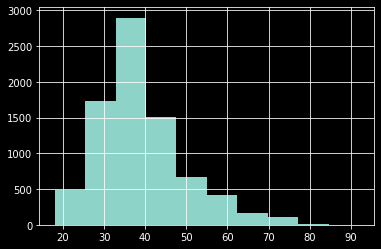

In [ ]:
train_full['Age'].hist()

In [ ]:
train_full['Age_group']=pd.qcut(train_full['Age'],5)

In [ ]:
train_full.groupby('Age_group')['Exited'].mean()

Age_group
(17.999, 31.0]    0.075422
(31.0, 35.0]      0.091994
(35.0, 40.0]      0.146912
(40.0, 46.0]      0.289971
(46.0, 92.0]      0.459854
Name: Exited, dtype: float64

In [ ]:
#вручную разобьем на те же интервалы, тк qcut - не постоянные границы,а относительные
train_full['Age_group']=pd.cut(train_full['Age'], [0, 31, 35, 40, 46, float('inf')] )

In [ ]:
 model= train_full.groupby(['NumOfProducts','Age_group'])['Exited'].mean().reset_index()

In [ ]:
model=model.rename({'Exited': 'score_prod_age'}, axis=1)

In [ ]:
model

,NumOfProducts,Age_group,score_prod_age
0,1,"(0.0, 31.0]",0.106774
1,1,"(31.0, 35.0]",0.135908
2,1,"(35.0, 40.0]",0.198646
3,1,"(40.0, 46.0]",0.378873
4,1,"(46.0, inf]",0.542506
5,2,"(0.0, 31.0]",0.029293
6,2,"(31.0, 35.0]",0.031206
7,2,"(35.0, 40.0]",0.059977
8,2,"(40.0, 46.0]",0.106239
9,2,"(46.0, inf]",0.225869


In [ ]:
train_full=train_full.merge(model, on = ['NumOfProducts','Age_group'], how = 'left')

In [ ]:
train_full=train_full.rename({'Exited_x':'Exited'},axis=1)

In [ ]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean,Age_group,score_prod_age
0,6876,15665283,Brookes,610,France,Female,57,7,72092.95,4,0,1,113228.82,1,0.999625,0.20375,"(46.0, inf]",1.000000
1,3153,15724161,Sutton,644,France,Female,40,9,137285.26,4,1,0,77063.63,1,0.999049,0.20375,"(35.0, 40.0]",1.000000
2,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1,0.999268,0.20375,"(46.0, inf]",1.000000
3,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,0.999401,0.20375,"(46.0, inf]",1.000000
4,7568,15750545,Chidiebere,629,France,Male,44,5,0.00,4,0,0,117572.59,1,0.999844,0.20375,"(40.0, 46.0]",1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7543,15768777,Wang,507,Spain,Female,34,4,0.00,2,1,1,60688.38,0,0.076776,0.20375,"(31.0, 35.0]",0.031206
7996,4011,15685654,Allan,514,Spain,Male,66,9,0.00,2,1,1,14234.31,0,0.076839,0.20375,"(46.0, inf]",0.225869
7997,4872,15575858,Bergamaschi,763,France,Male,40,3,0.00,2,1,0,134281.11,0,0.076593,0.20375,"(35.0, 40.0]",0.059977
7998,1650,15569423,Cunningham,731,Spain,Male,41,4,0.00,2,1,0,22299.27,0,0.076140,0.20375,"(40.0, 46.0]",0.106239


In [ ]:
log_loss(test['Exited'],test['score_prod'] )

0.4338658337619006

In [ ]:
uplift(test, 'score_prod', 0.2)

1.8427518427518426

In [ ]:
log_loss(train_full['Exited'], train_full['score_prod_age'] )

0.3866695862492173

In [ ]:
uplift(train_full, 'score_prod_age', 0.2)

2.7116564417177913

In [ ]:
#вручную разобьем на те же интервалы, тк qcut - не постоянные границы,а относительные
test['Age_group']=pd.cut(test['Age'], [0, 31, 35, 40, 46, float('inf')] )

In [ ]:
test=test.merge(model, on = ['NumOfProducts','Age_group'], how = 'left')


In [ ]:
log_loss(test['Exited'], test['score_prod_age'] )

0.3870707514157596

In [ ]:
uplift(test, 'score_prod_age', 0.2)

2.7518427518427515

IsActiveMember 

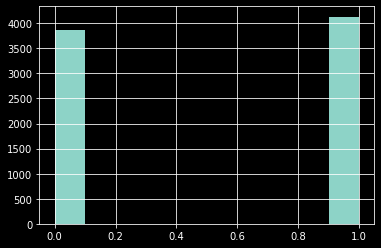

In [ ]:
train_full['IsActiveMember'].hist()

In [ ]:
train_full.groupby('IsActiveMember')['Exited'].mean()

IsActiveMember
0    0.267511
1    0.144033
Name: Exited, dtype: float64

In [ ]:
model = train_full.groupby(['NumOfProducts','Age_group', 'IsActiveMember'])['Exited'].mean().reset_index()

In [ ]:
model=model.rename({'Exited': 'score_prod_age_member'}, axis=1)

In [ ]:
model

,NumOfProducts,Age_group,IsActiveMember,score_prod_age_member
0,1,"(0.0, 31.0]",0,0.143885
1,1,"(0.0, 31.0]",1,0.072687
2,1,"(31.0, 35.0]",0,0.177650
3,1,"(31.0, 35.0]",1,0.094286
4,1,"(35.0, 40.0]",0,0.223714
5,1,"(35.0, 40.0]",1,0.173121
6,1,"(40.0, 46.0]",0,0.466146
7,1,"(40.0, 46.0]",1,0.276074
8,1,"(46.0, inf]",0,0.793103
9,1,"(46.0, inf]",1,0.334016


In [ ]:
train_full=train_full.merge(model, on = ['NumOfProducts','Age_group','IsActiveMember' ], how = 'left')

In [ ]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean,Age_group,score_prod_age,score_prod_age_member
0,6876,15665283,Brookes,610,France,Female,57,7,72092.95,4,0,1,113228.82,1,0.999625,0.20375,"(46.0, inf]",1.000000,1.000000
1,3153,15724161,Sutton,644,France,Female,40,9,137285.26,4,1,0,77063.63,1,0.999049,0.20375,"(35.0, 40.0]",1.000000,1.000000
2,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1,0.999268,0.20375,"(46.0, inf]",1.000000,1.000000
3,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,0.999401,0.20375,"(46.0, inf]",1.000000,1.000000
4,7568,15750545,Chidiebere,629,France,Male,44,5,0.00,4,0,0,117572.59,1,0.999844,0.20375,"(40.0, 46.0]",1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7543,15768777,Wang,507,Spain,Female,34,4,0.00,2,1,1,60688.38,0,0.076776,0.20375,"(31.0, 35.0]",0.031206,0.024390
7996,4011,15685654,Allan,514,Spain,Male,66,9,0.00,2,1,1,14234.31,0,0.076839,0.20375,"(46.0, inf]",0.225869,0.134048
7997,4872,15575858,Bergamaschi,763,France,Male,40,3,0.00,2,1,0,134281.11,0,0.076593,0.20375,"(35.0, 40.0]",0.059977,0.076923
7998,1650,15569423,Cunningham,731,Spain,Male,41,4,0.00,2,1,0,22299.27,0,0.076140,0.20375,"(40.0, 46.0]",0.106239,0.144262


In [ ]:
log_loss(train_full['Exited'], train_full['score_prod_age'] )

0.3866695862492173

In [ ]:
uplift(train_full, 'score_prod_age', 0.2)

2.7116564417177913

In [ ]:
log_loss(train_full['Exited'], train_full['score_prod_age_member'] )

0.36550197514510024

In [ ]:
uplift(train_full, 'score_prod_age_member', 0.2)

2.8496932515337425

In [ ]:
test=test.merge(model, on = ['NumOfProducts','Age_group','IsActiveMember' ], how = 'left')


In [ ]:
log_loss(test['Exited'], test['score_prod_age_member'] )

0.3638472889481342

In [ ]:
uplift(test, 'score_prod_age_member', 0.2)

2.862407862407862

Машинное обучение

In [ ]:
 !pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 48 kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
train_full.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'score_prod',
       'score_mean', 'Age_group', 'score_prod_age', 'score_prod_age_member'],
      dtype='object')

In [ ]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}

In [ ]:
model=CatBoostClassifier(**params)

In [ ]:
X=['NumOfProducts','Age','IsActiveMember']
y=['Exited']

In [ ]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

0:	learn: 0.6849803	test: 0.6849389	best: 0.6849389 (0)	total: 58.5ms	remaining: 58.5s
100:	learn: 0.3991169	test: 0.3930537	best: 0.3930537 (100)	total: 887ms	remaining: 7.9s
200:	learn: 0.3659581	test: 0.3563817	best: 0.3563817 (200)	total: 1.18s	remaining: 4.69s
300:	learn: 0.3589224	test: 0.3476566	best: 0.3476566 (300)	total: 1.39s	remaining: 3.23s
400:	learn: 0.3565171	test: 0.3446648	best: 0.3446648 (400)	total: 1.6s	remaining: 2.4s
500:	learn: 0.3553274	test: 0.3433005	best: 0.3432984 (498)	total: 1.85s	remaining: 1.84s
600:	learn: 0.3544987	test: 0.3425379	best: 0.3425379 (600)	total: 2.04s	remaining: 1.35s
700:	learn: 0.3539638	test: 0.3421168	best: 0.3421135 (699)	total: 2.46s	remaining: 1.05s
800:	learn: 0.3532817	test: 0.3419139	best: 0.3419139 (800)	total: 2.79s	remaining: 694ms
900:	learn: 0.3524351	test: 0.3416923	best: 0.3416923 (900)	total: 2.98s	remaining: 327ms
999:	learn: 0.3513546	test: 0.3417688	best: 0.3416551 (927)	total: 3.19s	remaining: 0us

bestTest = 0.3416

In [ ]:
#возьмем пока скоры, а не классы - predict_proba
model.predict_proba(test[X])[:,1]

array([0.12726722, 0.16007125, 0.23578686, ..., 0.14756771, 0.03997614,
       0.04603702])

In [ ]:
test['score_cat_prod_age_active']=model.predict_proba(test[X])[:,1]

In [ ]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,Age_group,score_prod_age,score_prod_age_member,score_cat_prod_age_active
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976


In [ ]:
def print_metrics(df, score):
    print(log_loss(df['Exited'], df[score] ))
    print(uplift(df, score, 0.2)) 

In [ ]:
#метрики по человеческому обучению
print_metrics(test, 'score_prod_age_member')

0.3638472889481342
2.862407862407862


In [ ]:
#метрики машинного обучения
print_metrics(test, 'score_cat_prod_age_active')

0.35878132799643003
2.899262899262899


Обучаемся на всех фичах

In [ ]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
X=['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
y=['Exited']
cat_features = ['Geography','Gender']

In [ ]:
train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1468,15681843,Barbour,624,Germany,Female,35,0,180303.24,2,1,0,163587.90,0
4644,4645,15714240,Ponomarev,712,Spain,Male,74,5,0.00,2,0,0,151425.82,0
8942,8943,15709780,Azuka,667,France,Female,37,9,71786.90,2,1,1,67734.79,0
2935,2936,15689425,Olejuru,687,Spain,Male,35,8,100988.39,2,1,0,22247.27,0


In [ ]:
#train.select_dtypes(include='object')

In [ ]:
from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                 )

In [ ]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate': 0.01}

In [ ]:
model=CatBoostClassifier(**params)

In [ ]:
model.fit(train_data, eval_set=valid_data)

0:	learn: 0.6848575	test: 0.6849145	best: 0.6849145 (0)	total: 44.3ms	remaining: 44.3s
100:	learn: 0.3908412	test: 0.3894043	best: 0.3894043 (100)	total: 1.58s	remaining: 14.1s
200:	learn: 0.3457312	test: 0.3445503	best: 0.3445503 (200)	total: 2.59s	remaining: 10.3s
300:	learn: 0.3288071	test: 0.3307084	best: 0.3307084 (300)	total: 4.08s	remaining: 9.47s
400:	learn: 0.3192987	test: 0.3252459	best: 0.3252459 (400)	total: 6.53s	remaining: 9.75s
500:	learn: 0.3120470	test: 0.3221057	best: 0.3221057 (500)	total: 9.3s	remaining: 9.26s
600:	learn: 0.3054735	test: 0.3204300	best: 0.3204300 (600)	total: 12.1s	remaining: 8.02s
700:	learn: 0.2997053	test: 0.3192377	best: 0.3192377 (700)	total: 14.1s	remaining: 6.02s
800:	learn: 0.2946934	test: 0.3188206	best: 0.3187917 (794)	total: 16.9s	remaining: 4.2s
900:	learn: 0.2890177	test: 0.3185731	best: 0.3185731 (900)	total: 19.4s	remaining: 2.13s
999:	learn: 0.2831978	test: 0.3186396	best: 0.3185004 (978)	total: 22.8s	remaining: 0us

bestTest = 0.318

In [ ]:
test['score_cat_all_features']=model.predict_proba(test[X])[:,1]

In [ ]:
#метрики машинного обучения - по трем фичам
print_metrics(test, 'score_cat_prod_age_active')

0.35878132799643003
2.899262899262899


In [ ]:
#метрики машинного обучения - по всем фичам
print_metrics(test, 'score_cat_all_features')

0.3296082204006806
3.1449631449631448


In [ ]:
# метрики машинного обучения по всем фичам лучше метрик машинного обучения по трем фичам, 
#и лучше метрик человеческого обучения

Feature importances

In [ ]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,NumOfProducts,27.408724
1,Age,21.567747
2,Balance,11.455919
3,Geography,10.011145
4,IsActiveMember,7.420335
5,EstimatedSalary,5.163513
6,CustomerId,4.965796
7,CreditScore,4.482999
8,Tenure,3.637201
9,Gender,3.089379


In [ ]:
phik_overview['Exited'].sort_values(ascending=False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

SHAP - вклад каждой фичи

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.2 MB/s 


In [ ]:
import shap
shap.initjs()

In [ ]:
#из туториала
explainer = shap.TreeExplainer(model)

In [ ]:
#для тестовой выборки
shap_values = explainer.shap_values(test[X])

In [ ]:
shap_values

array([[-1.21402913e-02,  3.59994404e-02, -1.73743578e-01, ...,
         1.22660764e-02,  3.12818186e-01, -1.06335452e-04],
       [ 1.84621454e-03,  2.19840607e-01, -2.99819933e-01, ...,
        -1.91283033e-02,  3.06197738e-01,  8.59692874e-02],
       [-2.22181751e-02,  3.57570327e-03, -2.64162412e-01, ...,
        -1.39453580e-02,  3.81632254e-01,  1.45909500e-01],
       ...,
       [-8.61817942e-03, -1.64316109e-01, -2.55817658e-01, ...,
         1.84893898e-03,  3.24125911e-01,  7.17717597e-02],
       [-4.33634982e-02, -6.34518183e-02, -1.83587386e-01, ...,
        -1.52189006e-02, -2.78703477e-01,  4.04987558e-03],
       [-3.03209008e-02,  1.11197887e-01,  1.29729276e-01, ...,
         6.32053650e-03, -2.53925205e-01,  3.91294346e-03]])

In [ ]:
pd.DataFrame(shap_values, columns=X) #вклад фичи

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.012140,0.035999,-0.173744,-0.161029,-0.972188,-0.002667,0.024682,0.950284,0.012266,0.312818,-0.000106
1,0.001846,0.219841,-0.299820,-0.200068,-0.910926,-0.038927,-0.126998,0.354417,-0.019128,0.306198,0.085969
2,-0.022218,0.003576,-0.264162,0.162667,-0.233191,-0.005680,-0.106059,0.379959,-0.013945,0.381632,0.145909
3,-0.020515,-0.093964,-0.356415,0.211848,-0.823140,0.011315,-0.116863,0.400608,-0.000451,0.391439,-0.050694
4,-0.027515,-0.177852,-0.175117,-0.176319,-0.638135,0.015371,0.028099,0.625067,-0.009415,-0.332940,-0.044709
...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.029693,0.090188,-0.098238,-0.160621,0.451729,-0.037550,-0.451806,-0.769674,-0.006630,-0.707848,0.027007
1996,-0.024189,0.082740,-0.122219,-0.148813,-0.417342,-0.023852,-0.046444,0.498236,-0.002880,-0.304703,0.028411
1997,-0.008618,-0.164316,-0.255818,-0.168059,0.640501,0.011280,0.304297,-0.597312,0.001849,0.324126,0.071772
1998,-0.043363,-0.063452,-0.183587,0.281845,-0.257887,-0.033396,0.293884,-0.492744,-0.015219,-0.278703,0.004050


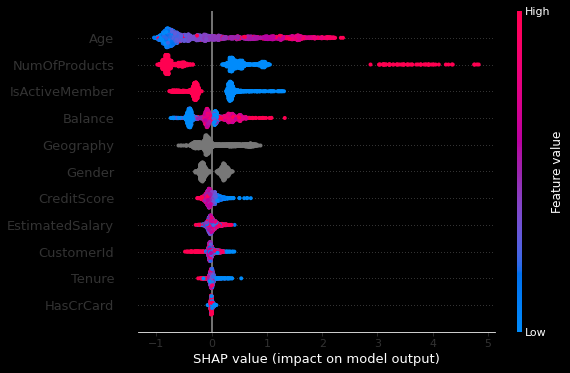

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, test[X])

In [ ]:
#чем больше возраст, тем больше и скор (внизу по горизонтали)
#NumOfProducts - когда значение продукта 2 - отток минимальный, там где 1 или 4 - отток больше
#

In [ ]:
train_full.groupby('NumOfProducts')['Exited'].agg(['count', 'mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


In [ ]:
plt.style.use('default')

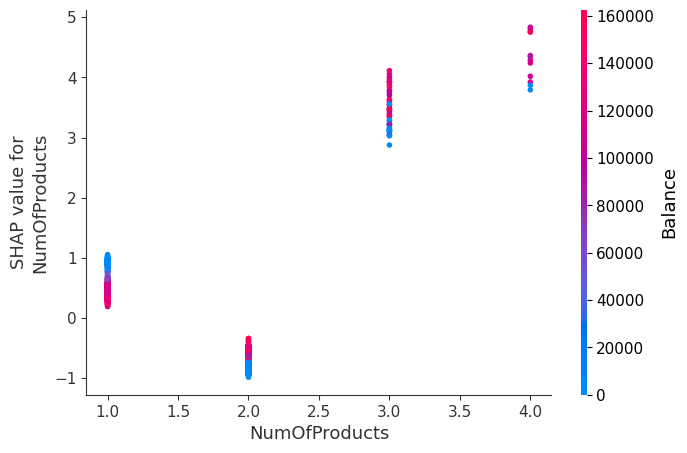

In [ ]:
#1 продукт - скор на отток выше, 2 - масый низкий, 3,4 - самый большой
shap.dependence_plot('NumOfProducts', shap_values, test[X])

In [ ]:
features = model.get_feature_importance(prettified=True)['Feature Id'].values

In [ ]:
features

array(['NumOfProducts', 'Age', 'Balance', 'Geography', 'IsActiveMember',
       'EstimatedSalary', 'CustomerId', 'CreditScore', 'Tenure', 'Gender',
       'HasCrCard'], dtype=object)

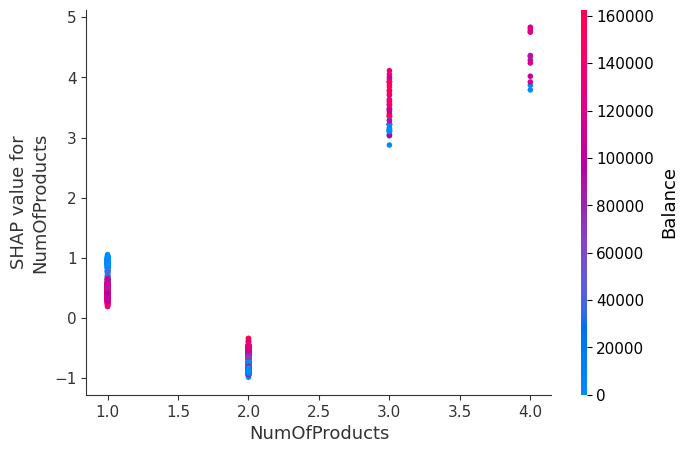

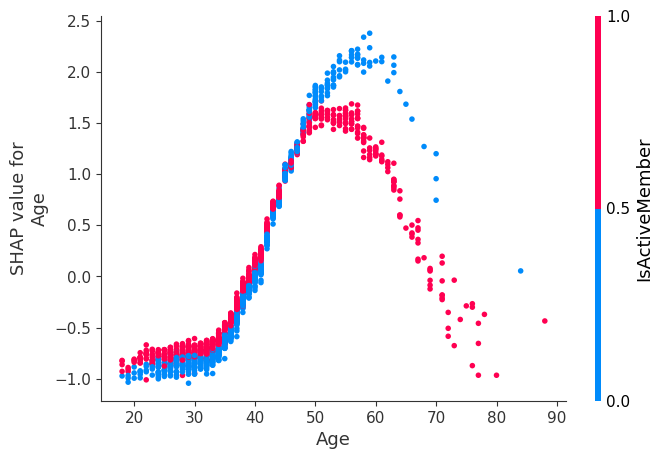

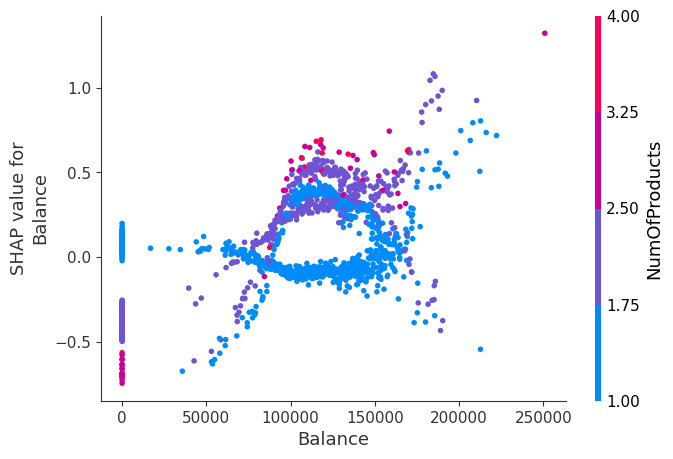

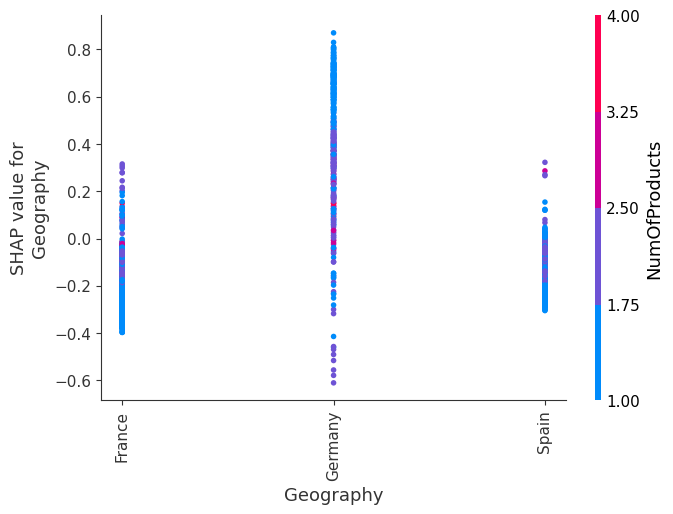

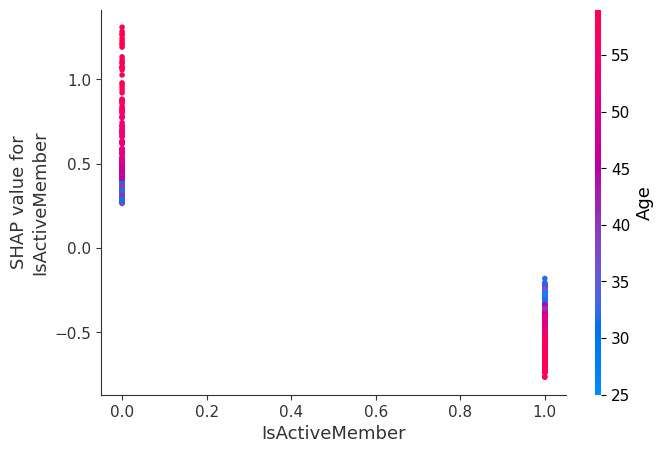

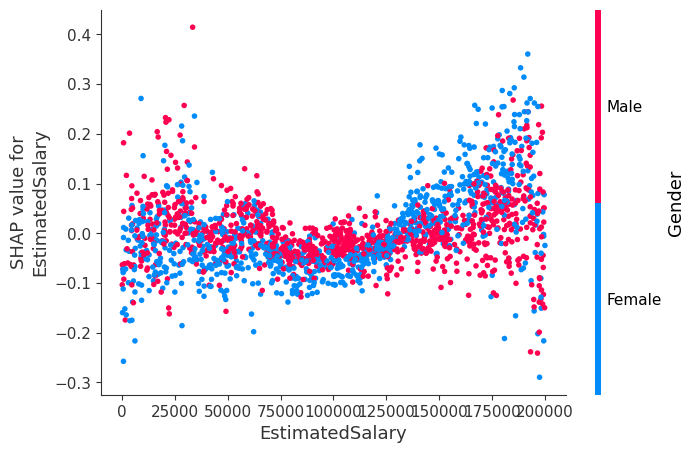

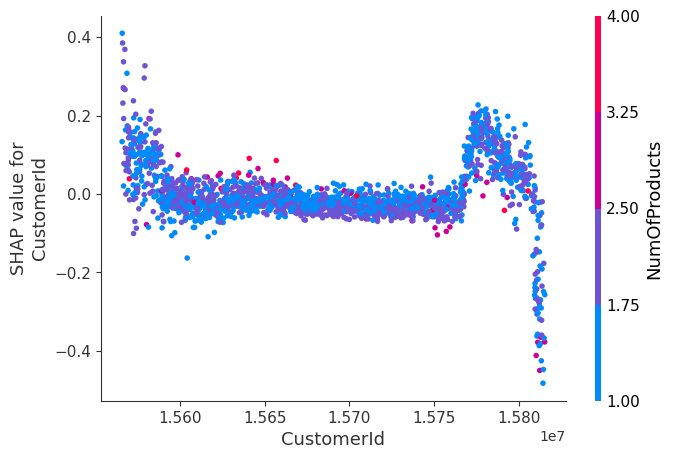

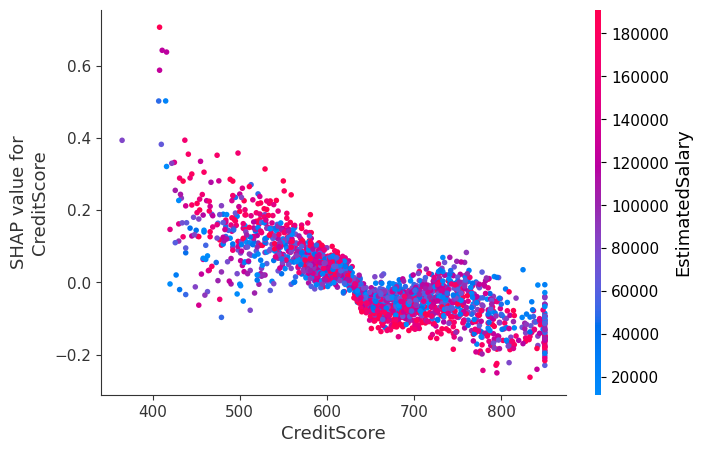

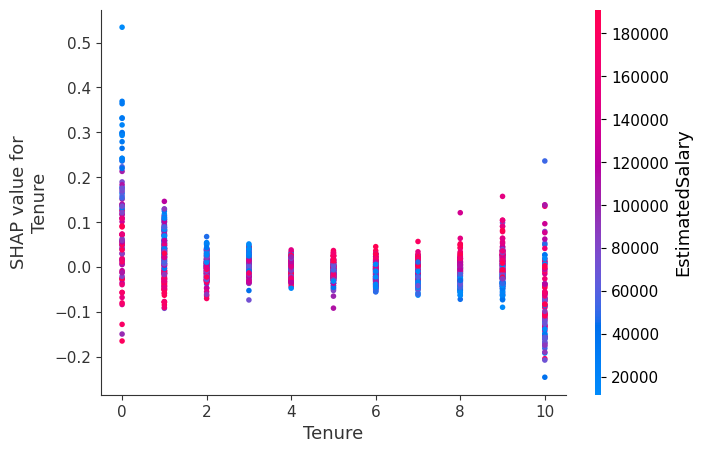

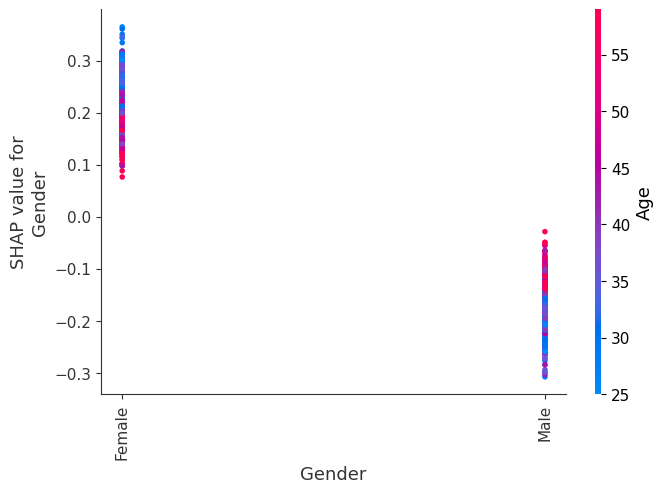

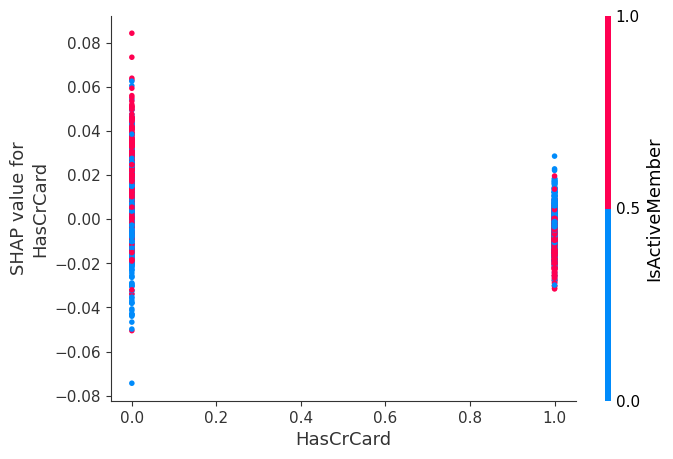

In [ ]:
for feature in features:
    shap.dependence_plot(feature, shap_values, test[X])

In [ ]:
model.predict(test[X], prediction_type = 'RawFormulaVal')

array([-1.88475323, -2.52652396, -1.47044046, ..., -1.73922605,
       -2.68750234, -2.93959577])

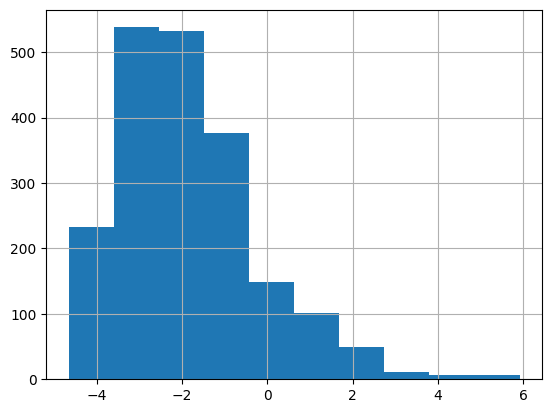

In [ ]:
pd.Series(model.predict(test[X], prediction_type = 'RawFormulaVal')).hist()

In [ ]:
import math
def sigmoid(X):
  return 1/(1+math.exp(-X))

In [ ]:
pd.Series(model.predict(test[X], prediction_type = 'RawFormulaVal')).apply(sigmoid)

0       0.131844
1       0.074020
2       0.186876
3       0.087403
4       0.056658
          ...   
1995    0.026803
1996    0.084712
1997    0.149411
1998    0.063715
1999    0.050231
Length: 2000, dtype: float64

In [ ]:
model.predict_proba(test[X])[:,1]

array([0.13184386, 0.07401954, 0.18687567, ..., 0.14941127, 0.06371485,
       0.05023055])

Скор и пороги

In [ ]:
test=test.rename({'score_cat_all_features':'score_catboost'}, axis=1)

In [ ]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,Age_group,score_prod_age,score_prod_age_member,score_cat_prod_age_active,score_catboost
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267,0.131844
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.074020
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787,0.186876
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.087403
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859,0.056658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185,0.026803
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713,0.084712
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568,0.149411
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976,0.063715


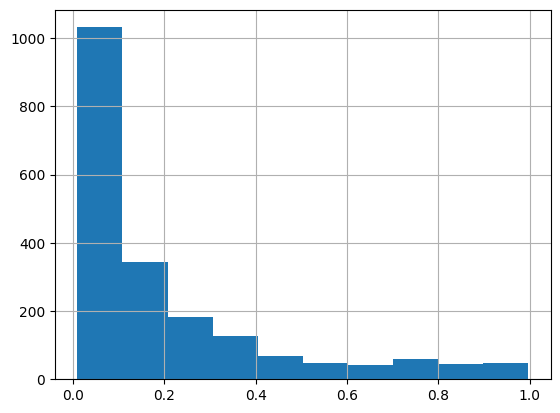

In [ ]:
test['score_catboost'].hist()

In [ ]:
train['Exited'].mean()

0.20366666666666666

In [ ]:
True * 1

1

In [ ]:
False * 1

0

In [ ]:
test['y_pred'] = (test['score_catboost'] > 0.5) * 1

In [ ]:
test['y_pred'].mean()

0.1225

Матрица ошибок

In [ ]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Exited,score_prod,Age_group,score_prod_age,score_prod_age_member,score_cat_prod_age_active,score_catboost,y_pred
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,...,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267,0.131844,0
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,...,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.074020,0
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,...,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787,0.186876,0
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,...,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.087403,0
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,...,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859,0.056658,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,...,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185,0.026803,0
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,...,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713,0.084712,0
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,...,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568,0.149411,0
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,...,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976,0.063715,0


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(test['Exited'],test['y_pred'])

array([[1537,   56],
       [ 218,  189]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(test['Exited'],test['y_pred']).ravel()

In [ ]:
tn, fp, fn, tp

(1537, 56, 218, 189)

Метрики классификации
https://en.wikipedia.org/wiki/Receiver_operating_characteristic

Recall (полнота)

In [ ]:
#предсказанные правильные единички делим на все реальные единички
recall = tp / (tp + fn)

In [ ]:
recall

0.4643734643734644

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(test['Exited'],test['y_pred'])

0.4643734643734644

In [ ]:
test['y_pred_1'] = 1

In [ ]:
recall_score(test['Exited'],test['y_pred_1'])

1.0

Precision (точность)

In [ ]:
#предсказанные правильные единички делим на все ПРЕДСКАЗАННЫЕ единички
precision = tp / (tp + fp)

In [ ]:
precision

0.7714285714285715

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(test['Exited'],test['y_pred'])

0.7714285714285715

In [ ]:
precision_score(test['Exited'],test['y_pred_1'])

0.2035

In [ ]:
test['Exited'].mean()

0.2035

F1

In [ ]:
f1 = (2 * recall * precision) / (recall + precision)

In [ ]:
f1

0.5797546012269938

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(test['Exited'],test['y_pred'])

0.5797546012269938

Accuracy - не использовать для несбалансированных классов

In [ ]:
(test['Exited'] == test['y_pred']).mean()

0.863

In [ ]:
#все правильные ответы делим на все ответы
(tp + tn) / (tp + tn + fp + fn)

0.863

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(test['Exited'],test['y_pred'])

0.863

In [ ]:
test['Exited'].mean()

0.2035

In [ ]:
test['y_pred_0'] = 0

In [ ]:
accuracy_score(test['Exited'],test['y_pred_0'])

0.7965

In [ ]:
1 - test['Exited'].mean()

0.7965

Classification report

F1 должна быть максимальной, И нужно выбрать порог с максимальным F1

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test['Exited'],test['y_pred']))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
precision

0.7714285714285715

In [ ]:
recall

0.4643734643734644

In [ ]:
f1

0.5797546012269938

Предикт с другим порогом

In [ ]:
test['y_pred_new'] = (test['score_catboost'] > 0.4) * 1

In [ ]:
f1_score(test['Exited'],test['y_pred'])

0.5797546012269938

In [ ]:
f1_score(test['Exited'],test['y_pred_new'])

0.6104972375690608

In [ ]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,score_prod,Age_group,score_prod_age,score_prod_age_member,score_cat_prod_age_active,score_catboost,y_pred,y_pred_1,y_pred_0,y_pred_new
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,...,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267,0.131844,0,1,0,0
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,...,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.074020,0,1,0,0
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,...,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787,0.186876,0,1,0,0
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,...,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.087403,0,1,0,0
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,...,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859,0.056658,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,...,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185,0.026803,0,1,0,0
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,...,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713,0.084712,0,1,0,0
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,...,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568,0.149411,0,1,0,0
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,...,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976,0.063715,0,1,0,0


In [ ]:
len(test['score_catboost'])

2000

In [ ]:
test['score_catboost'].nunique()

2000

In [ ]:
thrs = [0] + list(test['score_catboost'].unique())

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
result = []
for thr in tqdm(thrs):
  test['y_pred_new'] = (test['score_catboost'] > thr) * 1
  result.append((thr,
                 f1_score(test['Exited'],test['y_pred_new'])))

  0%|          | 0/2001 [00:00<?, ?it/s]

In [ ]:
result[:10]

[(0, 0.3381803074366431),
 (0.13184386080460458, 0.5536277602523659),
 (0.07401954387476314, 0.47174447174447176),
 (0.18687567474270395, 0.5938069216757741),
 (0.0874034938715728, 0.4940239043824701),
 (0.056658162909274605, 0.43680709534368073),
 (0.06161072773132977, 0.44610091743119257),
 (0.5563161171624521, 0.5544871794871795),
 (0.20388734500811342, 0.6096153846153847),
 (0.0455555402676573, 0.40841457157516675)]

In [ ]:
pd.DataFrame(result,columns=['thr','f1'])

,thr,f1
0,0.000000,0.338180
1,0.131844,0.553628
2,0.074020,0.471744
3,0.186876,0.593807
4,0.087403,0.494024
...,...,...
1996,0.026803,0.372007
1997,0.084712,0.486628
1998,0.149411,0.570720
1999,0.063715,0.450116


In [ ]:
t = pd.DataFrame(result,columns=['thr','f1'])

In [ ]:
t.sort_values('f1',ascending=False)

,thr,f1
640,0.277932,0.636771
623,0.280837,0.636569
1343,0.276637,0.636058
1756,0.331582,0.636025
1228,0.278005,0.635955
...,...,...
238,0.992916,0.019465
315,0.993195,0.014634
180,0.994941,0.009780
1205,0.997245,0.004902


In [ ]:
#лучший порог - thr=0.277932 (максимальный F1)
t[t['f1'] == t['f1'].max()]

,thr,f1
640,0.277932,0.636771


ROC

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
roc_curve(test['Exited'],test['score_catboost'])

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.27746390e-04,
        6.27746390e-04, 1.25549278e-03, 1.25549278e-03, 1.88323917e-03,
        1.88323917e-03, 2.51098556e-03, 2.51098556e-03, 3.13873195e-03,
        3.13873195e-03, 3.76647834e-03, 3.76647834e-03, 4.39422473e-03,
        4.39422473e-03, 5.02197112e-03, 5.02197112e-03, 6.27746390e-03,
        6.27746390e-03, 6.90521030e-03, 6.90521030e-03, 7.53295669e-03,
        7.53295669e-03, 8.16070308e-03, 8.16070308e-03, 8.78844947e-03,
        8.78844947e-03, 9.41619586e-03, 9.41619586e-03, 1.00439422e-02,
        1.00439422e-02, 1.06716886e-02, 1.06716886e-02, 1.12994350e-02,
        1.12994350e-02, 1.19271814e-02, 1.19271814e-02, 1.31826742e-02,
        1.31826742e-02, 1.38104206e-02, 1.38104206e-02, 1.44381670e-02,
        1.44381670e-02, 1.50659134e-02, 1.50659134e-02, 1.56936598e-02,
        1.56936598e-02, 1.69491525e-02, 1.69491525e-02, 1.75768989e-02,
        1.75768989e-02, 1.82046453e-02, 1.82046453e-02, 2.008788

In [ ]:
fprs, tprs, thrs = roc_curve(test['Exited'],test['score_catboost'])

In [ ]:
roc = pd.DataFrame({'fpr':fprs,'tpr':tprs,'thr':thrs})

In [ ]:
roc

,fpr,tpr,thr
0,0.000000,0.000000,1.997318
1,0.000000,0.002457,0.997318
2,0.000000,0.061425,0.933737
3,0.000628,0.061425,0.933203
4,0.000628,0.120393,0.891551
...,...,...,...
391,0.979912,0.995086,0.012212
392,0.979912,0.997543,0.012198
393,0.998745,0.997543,0.009886
394,0.998745,1.000000,0.009809


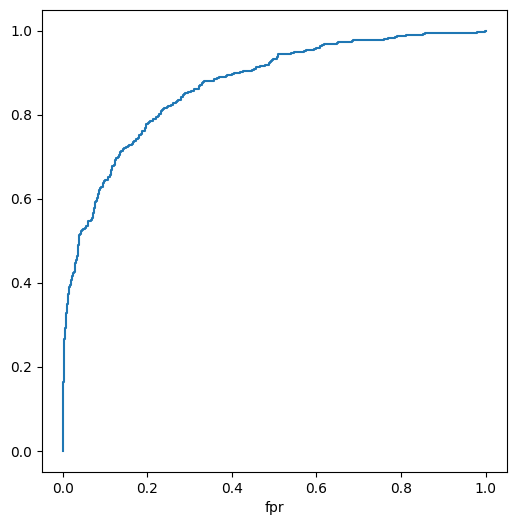

In [ ]:
#'fpr' - по оси Х
roc.set_index('fpr')['tpr'].plot(figsize=(6,6))

In [ ]:
roc['random'] = roc['fpr']

In [ ]:
roc['ideal'] = 1

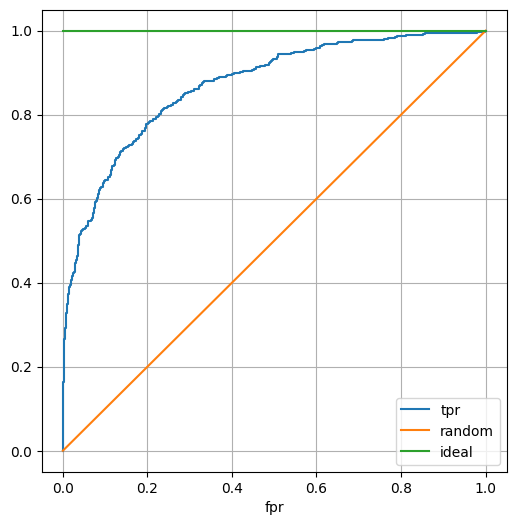

In [ ]:
roc.plot(x='fpr',y=['tpr','random','ideal'],figsize=(6,6),grid=True)

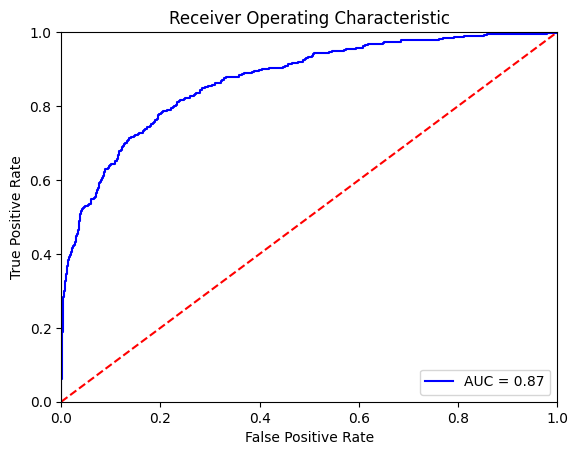

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(test['Exited'], test['score_catboost'])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from catboost.utils import get_roc_curve

In [ ]:
test_data = Pool(data=test[X],
                  label=test[y],
                  cat_features=cat_features
                 )

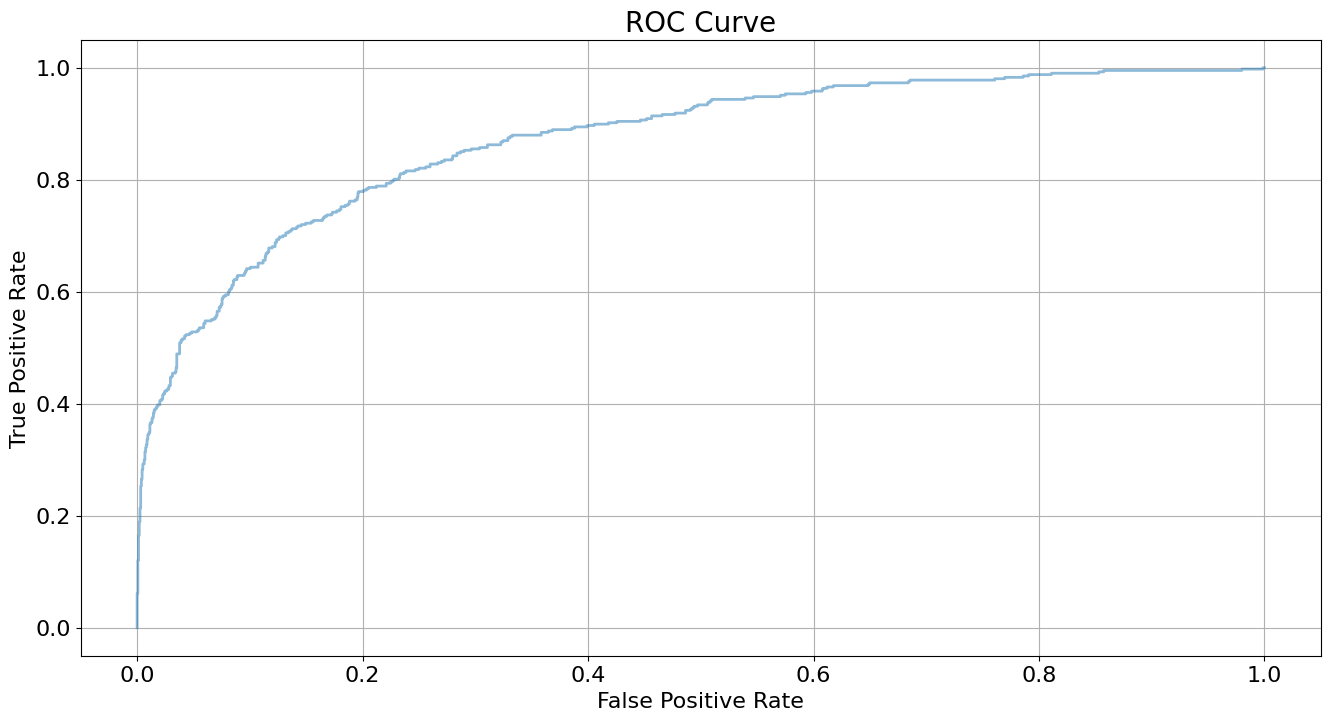

In [ ]:
get_roc_curve(model,test_data,plot=True);

AUC

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(test['Exited'],test['score_catboost'])

0.8703063618317854

In [ ]:
# Поменяли  'eval_metric':'AUC', bestTest = 0.8838694083 - площадь под кривой ROC
params = {'verbose':100,
          'eval_metric':'AUC',
          'random_seed':42,
          'learning_rate':0.01}

In [ ]:
model = CatBoostClassifier(**params)

In [ ]:
model.fit(train_data,eval_set=valid_data)

0:	test: 0.8338545	best: 0.8338545 (0)	total: 12.3ms	remaining: 12.3s
100:	test: 0.8725090	best: 0.8725090 (100)	total: 1.13s	remaining: 10.1s
200:	test: 0.8784656	best: 0.8784656 (200)	total: 2.25s	remaining: 8.94s
300:	test: 0.8812676	best: 0.8812676 (300)	total: 3.06s	remaining: 7.11s
400:	test: 0.8823868	best: 0.8824376 (390)	total: 3.86s	remaining: 5.77s
500:	test: 0.8834491	best: 0.8834522 (498)	total: 4.67s	remaining: 4.65s
600:	test: 0.8834737	best: 0.8836554 (564)	total: 5.47s	remaining: 3.63s
700:	test: 0.8837847	best: 0.8838694 (685)	total: 6.26s	remaining: 2.67s
800:	test: 0.8834383	best: 0.8838694 (685)	total: 7.07s	remaining: 1.76s
900:	test: 0.8829318	best: 0.8838694 (685)	total: 7.88s	remaining: 866ms
999:	test: 0.8822744	best: 0.8838694 (685)	total: 8.71s	remaining: 0us

bestTest = 0.8838694083
bestIteration = 685

Shrink model to first 686 iterations.


ROC AUC при сильно несбалансированных классах

In [ ]:
t = pd.DataFrame({'y_true':[0]*990 + [1]*10})

In [ ]:
t['y_true'].mean()

0.01

In [ ]:
import numpy as np

In [ ]:
np.random.uniform(0,0.2)

0.15317093802511803

In [ ]:
np.random.uniform(0.8,1)

0.8992729158340094

In [ ]:
np.concatenate([np.random.uniform(0,0.2,size=2),np.random.uniform(0.8,1,size=3)])

array([0.13450792, 0.02546606, 0.92417914, 0.96215615, 0.81242775])

In [ ]:
t = pd.DataFrame({'y_true':[0]*990 + [1]*10})

In [ ]:

np.random.seed(42)
t['y_score1'] = np.concatenate([np.random.uniform(0,0.2,size=970), # TN
                                np.random.uniform(0.8,1,size=20), # FP
                                np.random.uniform(0,0.2,size=5), # FN
                                np.random.uniform(0.8,1,size=5)]) # TP

In [ ]:
roc_auc_score(t['y_true'],t['y_score1'])

0.7664646464646465

In [ ]:
np.random.seed(42)
t['y_score2'] = np.concatenate([np.random.uniform(0,0.2,size=850), # TN
                                np.random.uniform(0.8,1,size=140), # FP
                                np.random.uniform(0,0.2,size=2), # FN
                                np.random.uniform(0.8,1,size=8)]) # TP

In [ ]:
roc_auc_score(t['y_true'],t['y_score2'])

0.873939393939394

Precision recall curve 

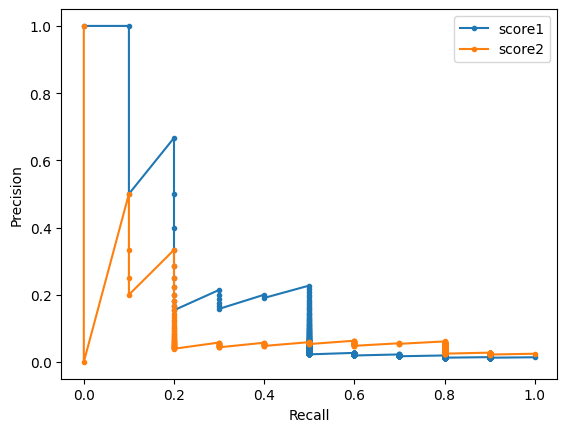

In [ ]:
#вместо tpr и fpr строится Precision и Recall
#чем выше - тем лучше
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

precision1, recall1, _ = precision_recall_curve(t['y_true'], t['y_score1'])
precision2, recall2, _ = precision_recall_curve(t['y_true'], t['y_score2'])


# plot the precision-recall curves
pyplot.plot(recall1, precision1, marker='.', label='score1')
pyplot.plot(recall2, precision2, marker='.', label='score2')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
average_precision_score(t['y_true'],t['y_score1'])

0.24047423356816472

In [ ]:
average_precision_score(t['y_true'],t['y_score2'])

0.12387717860283662

Сравним человеческое и машинное обучение

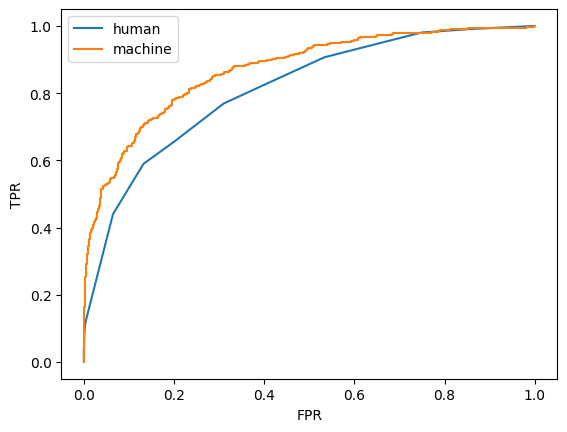

In [ ]:
fpr1, tpr1, _ = roc_curve(test['Exited'], test['score_prod_age'])
fpr2, tpr2, _ = roc_curve(test['Exited'], test['score_catboost'])


# plot the precision-recall curves
pyplot.plot(fpr1, tpr1, label='human')
pyplot.plot(fpr2, tpr2, label='machine')
# axis labels
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
roc_auc_score(test['Exited'], test['score_prod_age'])

0.8119961255554475

In [ ]:
roc_auc_score(test['Exited'], test['score_catboost'])

0.8703063618317854

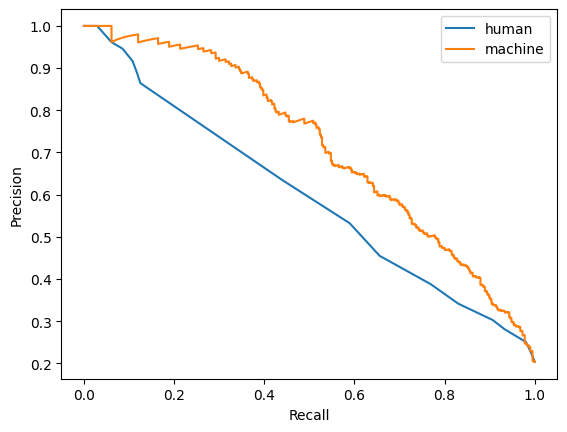

In [ ]:
precision1, recall1, _ = precision_recall_curve(test['Exited'], test['score_prod_age'])
precision2, recall2, _ = precision_recall_curve(test['Exited'], test['score_catboost'])


# plot the precision-recall curves
pyplot.plot(recall1, precision1, label='human')
pyplot.plot(recall2, precision2, label='machine')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
average_precision_score(test['Exited'], test['score_prod_age'])

0.5397719144338842

In [ ]:

average_precision_score(test['Exited'], test['score_catboost'])

0.7138074084585948

Дисбаланс классов не проблема

In [ ]:
test['Exited'].mean()

0.2035

In [ ]:
#автоматическая балансировка классов 'auto_class_weights':'Balanced'
params = {'verbose':100,
          'eval_metric':'AUC',
          'auto_class_weights':'Balanced',
          'random_seed':42,
          'learning_rate':0.01}

In [ ]:
model = CatBoostClassifier(**params)

In [ ]:
model.fit(train_data,eval_set=valid_data)

0:	test: 0.8310171	best: 0.8310171 (0)	total: 37.1ms	remaining: 37s
100:	test: 0.8726691	best: 0.8727215 (99)	total: 2.13s	remaining: 19s
200:	test: 0.8780837	best: 0.8781684 (199)	total: 4.04s	remaining: 16.1s
300:	test: 0.8805532	best: 0.8806579 (293)	total: 5.51s	remaining: 12.8s
400:	test: 0.8818510	best: 0.8818649 (397)	total: 7.24s	remaining: 10.8s
500:	test: 0.8821682	best: 0.8822452 (481)	total: 9.09s	remaining: 9.05s
600:	test: 0.8824284	best: 0.8826070 (561)	total: 11.1s	remaining: 7.39s
700:	test: 0.8823145	best: 0.8826070 (561)	total: 12.5s	remaining: 5.34s
800:	test: 0.8819619	best: 0.8826070 (561)	total: 13.4s	remaining: 3.32s
900:	test: 0.8814015	best: 0.8826070 (561)	total: 14.2s	remaining: 1.56s
999:	test: 0.8803392	best: 0.8826070 (561)	total: 15s	remaining: 0us

bestTest = 0.8826069687
bestIteration = 561

Shrink model to first 562 iterations.


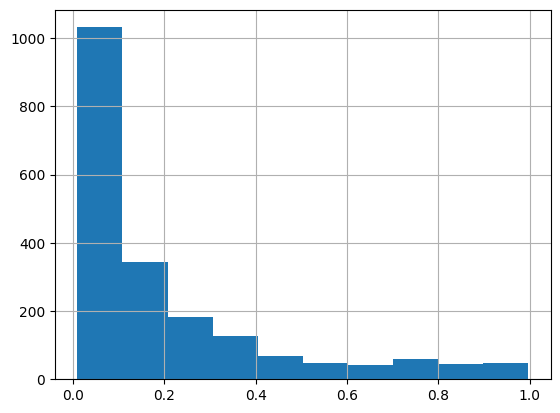

In [ ]:
test['score_catboost'].hist()

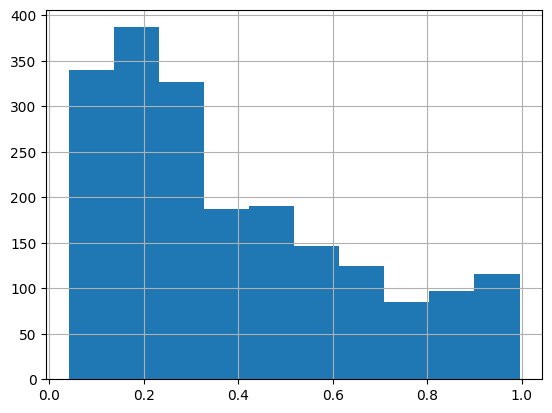

In [ ]:
#изменилось распределение
pd.Series(model.predict_proba(test[X])[:,1]).hist()

In [ ]:
test['score_cat_non_balanced_bins'] = pd.cut(test['score_catboost'],10)

In [ ]:
test.groupby('score_cat_non_balanced_bins')['Exited'].agg(['count','mean'])

,count,mean
score_cat_non_balanced_bins,,
"(0.00838, 0.108]",1032,0.043605
"(0.108, 0.207]",343,0.142857
"(0.207, 0.306]",184,0.260870
"(0.306, 0.405]",128,0.359375
"(0.405, 0.503]",69,0.434783
"(0.503, 0.602]",49,0.530612
"(0.602, 0.701]",42,0.595238
"(0.701, 0.8]",59,0.830508
"(0.8, 0.899]",45,0.911111


In [ ]:
test['score_catboost_balanced'] = model.predict_proba(test[X])[:,1]

In [ ]:
test['score_cat_balanced_bins'] = pd.cut(test['score_catboost_balanced'],10)

In [ ]:
#этот скор не соответствует вероятности
test.groupby('score_cat_balanced_bins')['Exited'].agg(['count','mean'])

,count,mean
score_cat_balanced_bins,,
"(0.0404, 0.137]",340,0.011765
"(0.137, 0.232]",387,0.036176
"(0.232, 0.328]",327,0.082569
"(0.328, 0.423]",187,0.139037
"(0.423, 0.518]",190,0.210526
"(0.518, 0.614]",146,0.191781
"(0.614, 0.709]",125,0.464000
"(0.709, 0.805]",85,0.447059
"(0.805, 0.9]",97,0.670103
